# German Credit Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
credit_df = pd.read_csv("german_credit_data.csv")


# Perform EDA and any data cleaning if necessary.


In [5]:
credit_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
print(credit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None


In [7]:
# Set column names
credit_df.columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']

In [8]:
# Check for missing values
print(credit_df.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account    183
Credit amount       394
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [9]:
# Check for data types
print(credit_df.dtypes)

Age                  int64
Sex                  int64
Job                 object
Housing              int64
Saving accounts     object
Checking account    object
Credit amount       object
Duration             int64
Purpose              int64
Risk                object
dtype: object


In [10]:
# Explore the data distribution
print(credit_df.describe())

               Age          Sex      Housing      Duration      Purpose
count  1000.000000  1000.000000  1000.000000   1000.000000  1000.000000
mean    499.500000    35.546000     1.904000   3271.258000    20.903000
std     288.819436    11.375469     0.653614   2822.736876    12.058814
min       0.000000    19.000000     0.000000    250.000000     4.000000
25%     249.750000    27.000000     2.000000   1365.500000    12.000000
50%     499.500000    33.000000     2.000000   2319.500000    18.000000
75%     749.250000    42.000000     2.000000   3972.250000    24.000000
max     999.000000    75.000000     3.000000  18424.000000    72.000000


In [12]:
# Check the data type of 'Credit amount'
print(credit_df['Credit amount'].dtype)

object


In [15]:
# Ensure 'Credit amount' is numeric
credit_df['Credit amount'] = pd.to_numeric(credit_df['Credit amount'], errors='coerce')

In [16]:
# Drop any NaN values that might have been introduced during the conversion
credit_df = credit_df.dropna(subset=['Credit amount'])

In [17]:

# Verify the data type of 'Credit amount'
print(credit_df['Credit amount'].dtype)

float64


In [19]:
# Verify the data type of 'Credit amount'
print("Data type of 'Credit amount':", credit_df['Credit amount'].dtype)

Data type of 'Credit amount': float64


In [20]:
# Verify the range of 'Credit amount'
print("Summary statistics for 'Credit amount':\n", credit_df['Credit amount'].describe())

Summary statistics for 'Credit amount':
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Credit amount, dtype: float64


In [22]:
credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


<AxesSubplot:>

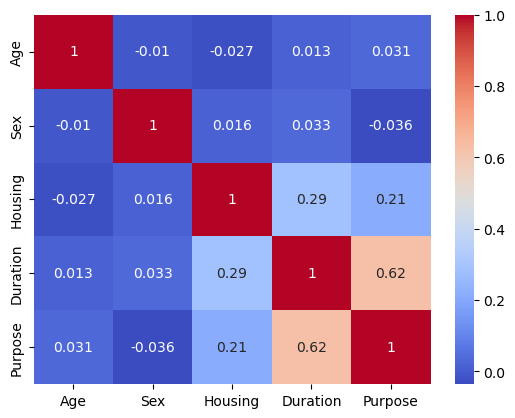

In [10]:
# Check for correlations
corr_matrix = credit_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Here We get Meximum Corelation of Credit Amount which is 0.62

In this data we have null value in "Saving Accounts" and "Checking Account" so here we will remove null value with the help of fillna() function

In [13]:
#Now we will fix the missing value
credit_df["Credit amount"].fillna(credit_df["Credit amount"].mode()[0], inplace=True)
credit_df["Checking account"].fillna(credit_df["Checking account"].mode()[0], inplace=True)


In [14]:
print(credit_df.isnull().sum())
#Now we can so we do not have any null value

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


Now we can see that we do not have any null value

# Question 2: Perform one hot encoding for categorical variables


In [15]:
# Select the categorical columns
cat_cols = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]

# Perform one hot encoding
credit_df = pd.get_dummies(credit_df, columns=cat_cols)


The code is performing one-hot encoding on the categorical columns of the dataset. One-hot encoding is a technique used to convert categorical variables into a format that can be easily used for machine learning algorithms.

In [16]:
credit_df.head()

,Age,Job,Credit amount,Duration,Risk,Sex_19,Sex_20,Sex_21,Sex_22,Sex_23,...,Purpose_36,Purpose_39,Purpose_40,Purpose_42,Purpose_45,Purpose_47,Purpose_48,Purpose_54,Purpose_60,Purpose_72
0,0,male,little,1169,radio/TV,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,female,moderate,5951,radio/TV,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,male,little,2096,education,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,male,little,7882,furniture/equipment,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,male,little,4870,car,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Question 3: Visualize the histograms of numerical features. Do you observe skewness in the data? If yes apply the log transformation. Check the histograms again to see if data has been normalized

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# select numerical features
num_features = ['Age', 'Credit amount', 'Duration']

print(num_features)

['Age', 'Credit amount', 'Duration']


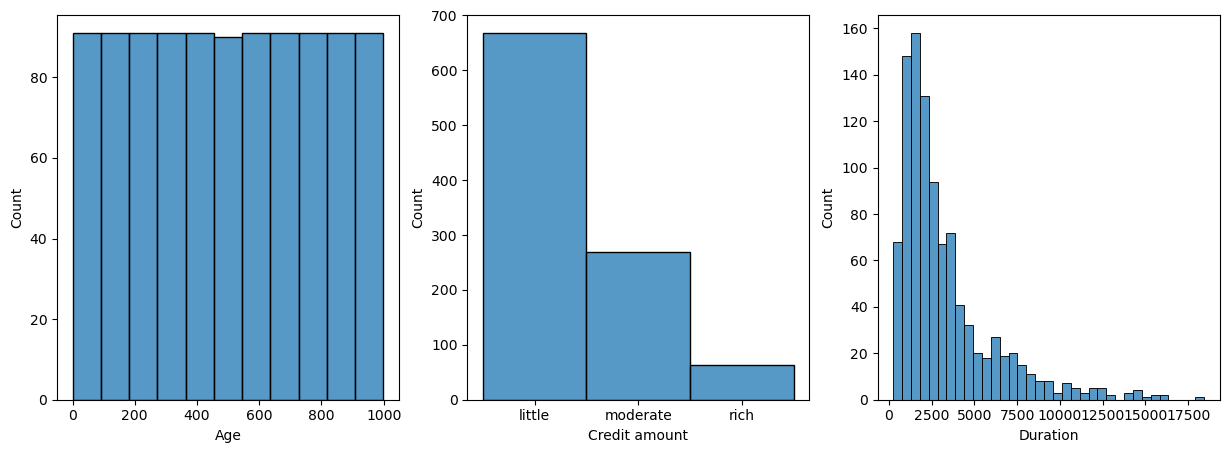

TypeError: could not convert string to float: 'little'

In [18]:
# visualize histograms
fig, axes = plt.subplots(nrows=1, ncols=len(num_features), figsize=(15, 5))

for i, col in enumerate(num_features):
    sns.histplot(credit_df[col], kde=False, ax=axes[i])
    axes[i].set_xlabel(col)

plt.show()

# apply log transformation if necessary
for col in num_features:
    if credit_df[col].skew() > 1:
        credit_df[col] = np.log(credit_df[col])

# visualize histograms again
fig, axes = plt.subplots(nrows=1, ncols=len(num_features), figsize=(15, 5))

for i, col in enumerate(num_features):
    sns.histplot(credit_df[col], kde=False, ax=axes[i])
    axes[i].set_xlabel(col)

plt.show()

Choose only the numerical features for clustering


In [57]:
# Selecting only the columns with numerical data types
numerical_cols = credit_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creating a new DataFrame with only the selected numerical columns
credit_numerical = credit_df[numerical_cols]
print(credit_numerical)

          Age  Job  Credit amount  Duration      Risk
0    2.271006    2      -0.933901 -1.864869 -0.654654
1   -1.446152    2       1.163046  1.708369  1.527525
2    1.226696    1      -0.181559 -0.673790 -0.654654
3    0.942455    2       1.525148  1.478913 -0.654654
4    1.488620    2       0.904743  0.517289  1.527525
..        ...  ...            ...       ...       ...
995 -0.301466    1      -0.424376 -0.673790 -0.654654
996  0.549317    3       0.604255  0.900731 -0.654654
997  0.378110    2      -1.416199 -0.673790 -0.654654
998 -1.297780    2      -0.345911  1.597468  1.527525
999 -0.762586    2       0.824508  1.597468 -0.654654

[1000 rows x 5 columns]


# Question 6: - Apply elbow method to find best number of clusters. Plot the graph. 


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


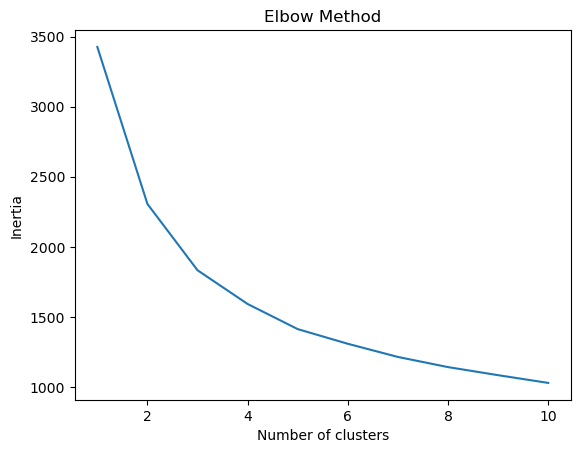

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(credit_numerical)
    wcss.append(kmeans.inertia_)

# Plot the inertia values against number of clusters
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Quesion 6: - Choose optimum number of clusters and visualize it using PCA


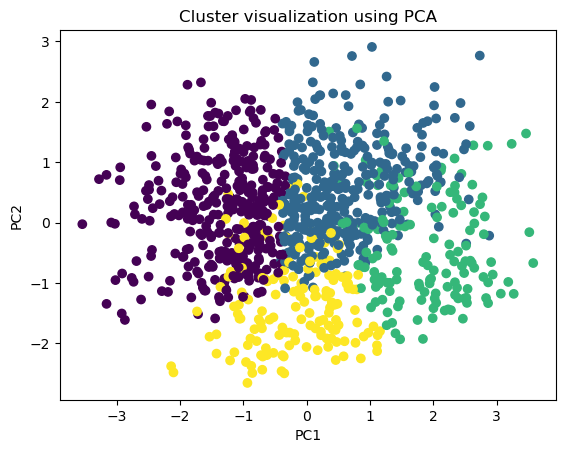

In [60]:
from sklearn.decomposition import PCA

# Choosing the number of clusters
n_clusters = 4

# Clustering using KMeans
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(credit_numerical)
labels = kmeans.labels_

# Visualizing the clusters using PCA
pca = PCA(n_components=2)
credit_pca = pca.fit_transform(credit_numerical)
plt.scatter(credit_pca[:, 0], credit_pca[:, 1], c=labels)
plt.title('Cluster visualization using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Question 7:- Implement KFOLD CV and use any classifier of your choosing and report the evaluation metrics


# RandomForestClassifier

In [88]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the number of folds for cross-validation
k_folds = 5

# Define the classifier
clf = RandomForestClassifier(n_estimators=100)

# Split the data into K-folds for cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

credit_target = credit_df.drop('Risk', axis=1)
credit_target = credit_target.replace({"good": 0, "bad": 1})

from sklearn import preprocessing
from sklearn import utils
 
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X = credit_df.drop(columns=["Risk"])
y = lab.fit_transform(credit_df["Risk"])#credit_df["Risk"]


# Define the evaluation metrics to be used
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over the K-folds
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
#     print(y_train)
#     # Train the classifier on the training data for this fold
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier on the testing data for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate the evaluation metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculate the mean of the evaluation metrics over all the folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)

# Print the evaluation metrics
print("Accuracy: {:.3f}".format(mean_accuracy))
print("Precision: {:.3f}".format(mean_precision))
print("Recall: {:.3f}".format(mean_recall))
print("F1-Score: {:.3f}".format(mean_f1))

Accuracy: 0.696
Precision: 0.493
Recall: 0.284
F1-Score: 0.360


# LogisticRegression

In [89]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing

# Define the number of folds for cross-validation
k_folds = 5

# Define the classifier
clf = LogisticRegression()

# Split the data into K-folds for cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

credit_target = credit_df.drop('Risk', axis=1)
credit_target = credit_target.replace({"good": 0, "bad": 1})

# Convert y values to categorical values
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(credit_df["Risk"])

X = credit_df.drop(columns=["Risk"])

# Define the evaluation metrics to be used
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over the K-folds
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the logistic regression model on the training data for this fold
    clf.fit(X_train, y_train)
    
    # Use the model to make predictions on the testing data for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate the evaluation metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculate the mean of the evaluation metrics over all the folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)

# Print the evaluation metrics
print("Accuracy: {:.3f}".format(mean_accuracy))
print("Precision: {:.3f}".format(mean_precision))
print("Recall: {:.3f}".format(mean_recall))
print("F1-Score: {:.3f}".format(mean_f1))


Accuracy: 0.711
Precision: 0.555
Recall: 0.242
F1-Score: 0.332


# SVC

In [90]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the number of folds for cross-validation
k_folds = 5

# Define the classifier
clf = SVC()

# Split the data into K-folds for cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

credit_target = credit_df.drop('Risk', axis=1)
credit_target = credit_target.replace({"good": 0, "bad": 1})

from sklearn import preprocessing
from sklearn import utils
 
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X = credit_df.drop(columns=["Risk"])
y = lab.fit_transform(credit_df["Risk"])#credit_df["Risk"]


# Define the evaluation metrics to be used
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over the K-folds
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the classifier on the training data for this fold
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier on the testing data for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate the evaluation metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculate the mean of the evaluation metrics over all the folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)

# Print the evaluation metrics
print("Accuracy: {:.3f}".format(mean_accuracy))
print("Precision: {:.3f}".format(mean_precision))
print("Recall: {:.3f}".format(mean_recall))
print("F1-Score: {:.3f}".format(mean_f1))


Accuracy: 0.706
Precision: 0.640
Recall: 0.103
F1-Score: 0.174


# KNeighborsClassifier

In [91]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the number of folds for cross-validation
k_folds = 5

# Define the classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Split the data into K-folds for cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

credit_target = credit_df.drop('Risk', axis=1)
credit_target = credit_target.replace({"good": 0, "bad": 1})

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X = credit_df.drop(columns=["Risk"])
y = lab.fit_transform(credit_df["Risk"])#credit_df["Risk"]


# Define the evaluation metrics to be used
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over the K-folds
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the classifier on the training data for this fold
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier on the testing data for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate the evaluation metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculate the mean of the evaluation metrics over all the folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)

# Print the evaluation metrics
print("Accuracy: {:.3f}".format(mean_accuracy))
print("Precision: {:.3f}".format(mean_precision))
print("Recall: {:.3f}".format(mean_recall))
print("F1-Score: {:.3f}".format(mean_f1))


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy: 0.673
Precision: 0.426
Recall: 0.266
F1-Score: 0.324


# GradientBoostingClassifier

In [92]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the number of folds for cross-validation
k_folds = 5

# Define the classifier
clf = GradientBoostingClassifier(n_estimators=100)

# Split the data into K-folds for cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

credit_target = credit_df.drop('Risk', axis=1)
credit_target = credit_target.replace({"good": 0, "bad": 1})

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X = credit_df.drop(columns=["Risk"])
y = lab.fit_transform(credit_df["Risk"])

# Define the evaluation metrics to be used
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over the K-folds
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the classifier on the training data for this fold
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier on the testing data for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate the evaluation metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculate the mean of the evaluation metrics over all the folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)

# Print the evaluation metrics
print("Accuracy: {:.3f}".format(mean_accuracy))
print("Precision: {:.3f}".format(mean_precision))
print("Recall: {:.3f}".format(mean_recall))
print("F1-Score: {:.3f}".format(mean_f1))


Accuracy: 0.696
Precision: 0.484
Recall: 0.258
F1-Score: 0.336
